In [5]:
using Distributions, Turing
using Gadfly

N = 10
y = [0, 1, 0, 1, 0, 0, 0, 0, 0, 1]

@model bernoulli(y) = begin
  p ~ Beta(1,1)
  for i =1:N
    y[i] ~ Bernoulli(p)
  end
  return(p)
end

s = sample(bernoulli(y), HMC(1000, 0.2, 5))

        # => 8.04s Mon 6 Mar 15:16:40
        # => 7.42s Tue 7 Mar 12:59:55 (a083e820c26f7a02e62d0d24f45890d774940cca)
        # => 6.25s Wed 8 Mar 11:01:55 (3d59ac810d7cca5ff642ff404e80e982c5173f27)


[Turing]:  Assume - `p` is a parameter
  in @~(::Any, ::Any) at compiler.jl:49
[Turing]:  Observe - `y` is an observation
  in @~(::Any, ::Any) at compiler.jl:28


[HMC] Sampling... 55%  ETA: 0:00:03

[HMC] Finished with
  Running time    = 3.6778093019999987;
  Accept rate     = 0.994;
  #lf / sample    = 4.995;
  #evals / sample = 4.997.


[HMC] Sampling...100% Time: 0:00:04


Object of type "Turing.Chain"

Iterations = 1:1000
Thinning interval = 1
Chains = 1
Samples per chain = 1000

[-9.30593 0.594863; -7.98656 0.227617; … ; -11.8409 0.734398; -7.66107 0.304659]

In [6]:
describe(s)

Iterations = 1:1000
Thinning interval = 1
Chains = 1
Samples per chain = 1000

Empirical Posterior Estimates:
       Mean        SD       Naive SE      MCSE     ESS
lp -8.13843193 0.69016785 0.021825024 0.014861164 1000
 p  0.33692265 0.12873012 0.004070804 0.003324595 1000

Quantiles:
       2.5%        25.0%       50.0%       75.0%      97.5%  
lp -10.08430211 -8.32146690 -7.85638114 -7.6875577 -7.6385109
 p   0.11832924  0.24311888  0.33227557  0.4218610  0.5962191



In [7]:
p = plot(s); 

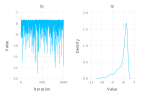

In [8]:
hstack(p[1], p[2])